In [ ]:
#Download pretrained VGG16 model
import os, sys
sys.path.append(os.path.abspath("/notebooks/AutoParser/squeezenet/models/slim/"))

from datasets import dataset_utils
import tensorflow as tf
slim = tf.contrib.slim

url = "http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz"

# Specify where you want to download the model to
checkpoints_dir = 'Matify/VGG16/checkpoints'

if not tf.gfile.Exists(checkpoints_dir):
    tf.gfile.MakeDirs(checkpoints_dir)

dataset_utils.download_and_uncompress_tarball(url, checkpoints_dir)

In [1]:
import tensorflow as tf
import sys 
import os
sys.path.append(os.path.abspath("/notebooks/AutoParser/squeezenet/models/slim/"))

from deployment import model_deploy
import MatifyDatasetPreprocessing
from tensorflow.python.ops import control_flow_ops
from MatifyDataset import MatifyDataset

slim = tf.contrib.slim
class args:
    num_gpus = 1
    data_dir = 'Matify/MatifyDataset/'
    output_training_dir = 'Matify/VGG16/Output'
    output_eval_dir = "Matify/VGG16/Output"
    checkpoints_dir = "Matify/VGG16/checkpoints"
    image_size = 224
    max_steps = 50000
    print_log_steps = 100
    save_summaries_secs = 60*2
    save_checkpoint_secs = 60*5
    eval_interval_secs = 60*2
    
    
    reader_threads = 2
    batch_size = 32
    preprocessing_threads = 6
    learning_rate = 0.005
    learning_rate_decay_steps = 5000
    learning_rate_decay = 0.75
    eval_device = 'gpu:0'
    
tf.logging.set_verbosity(tf.logging.INFO)
deploy_config = model_deploy.DeploymentConfig(num_clones=args.num_gpus)

Tensor("fifo_queue_Dequeue:0", shape=(32, 224, 224, 3), dtype=float32)
(32, 224, 224, 3)
(32, 10)
Class: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


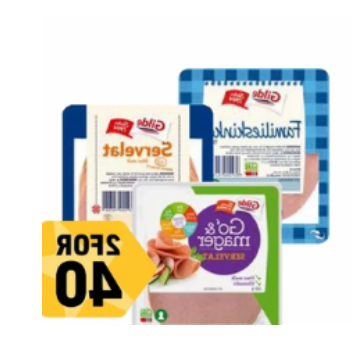

Class: [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


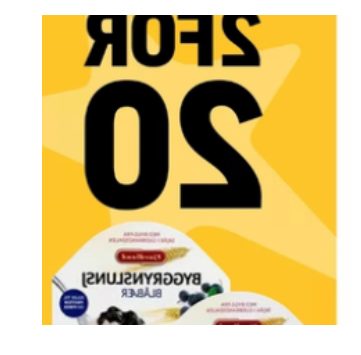

Class: [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


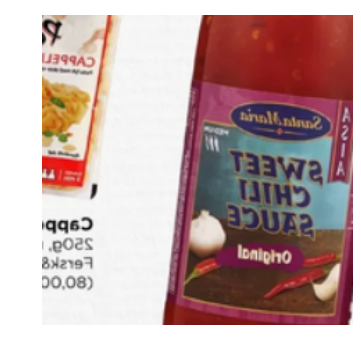

Class: [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


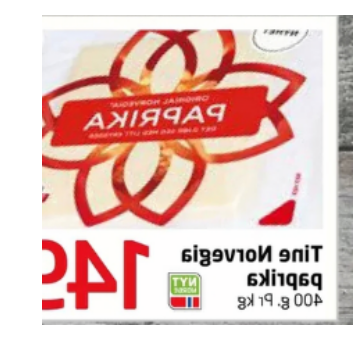

Class: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


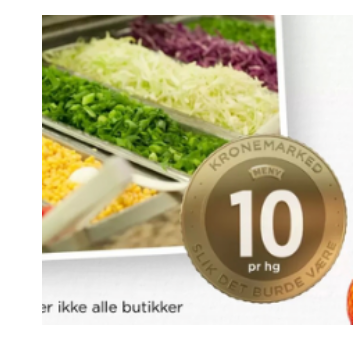

Class: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


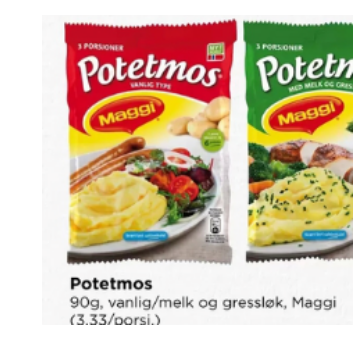

Class: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


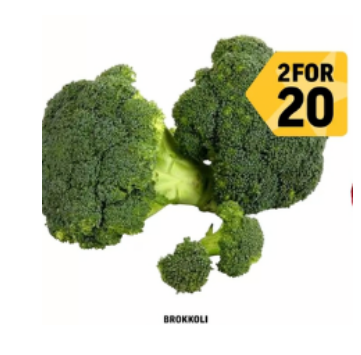

Class: [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


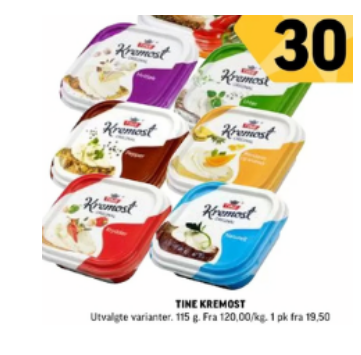

Class: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


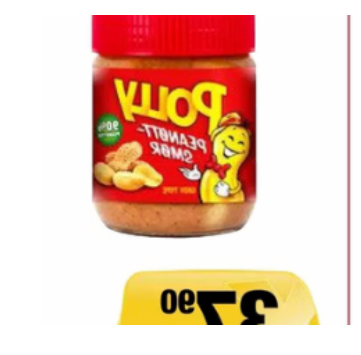

Class: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


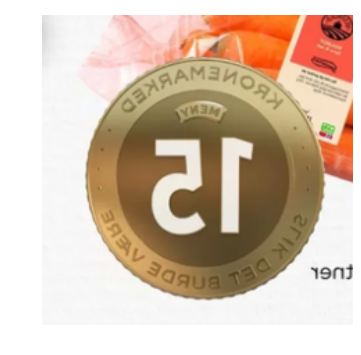

Class: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


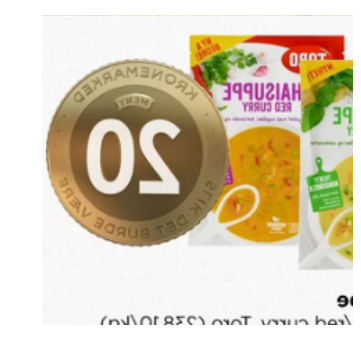

Class: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


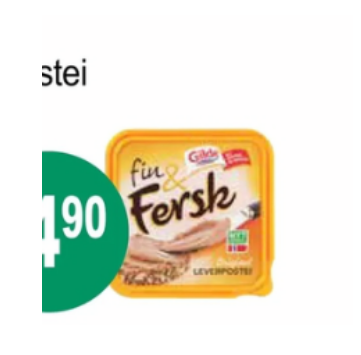

Class: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


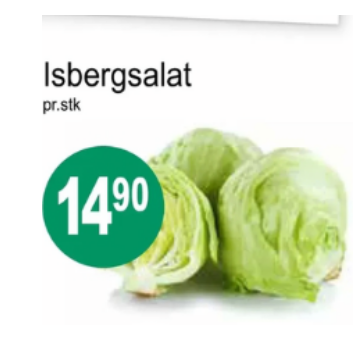

Class: [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


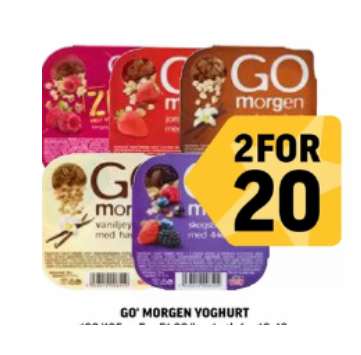

Class: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


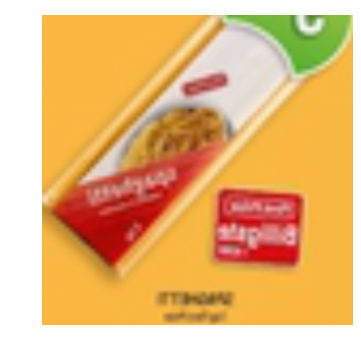

Class: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


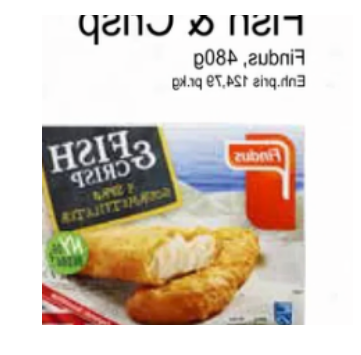

Class: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


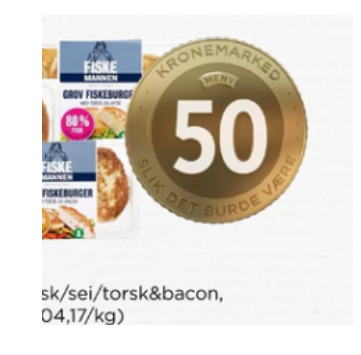

Class: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


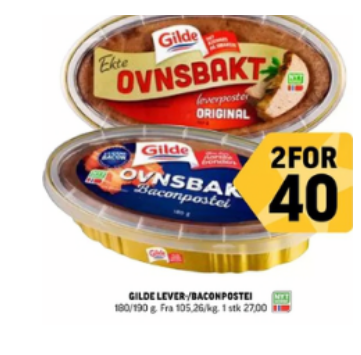

Class: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


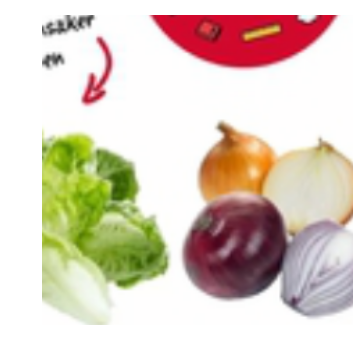

Class: [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


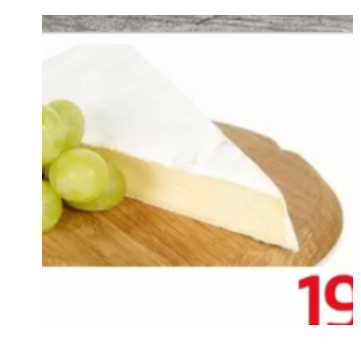

Class: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


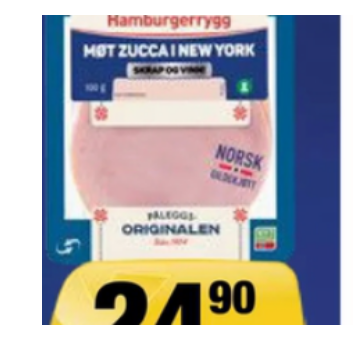

Class: [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


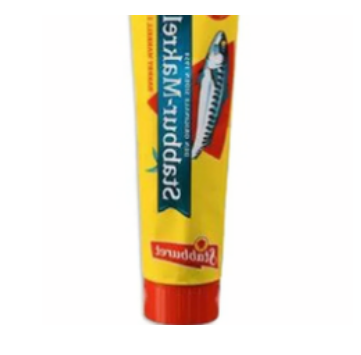

Class: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


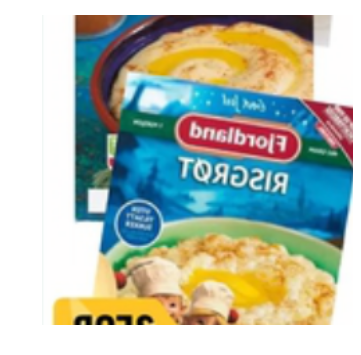

Class: [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


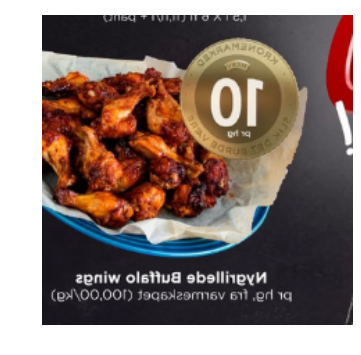

Class: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


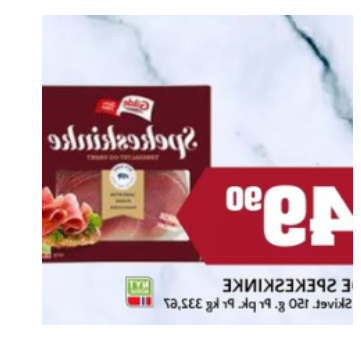

Class: [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


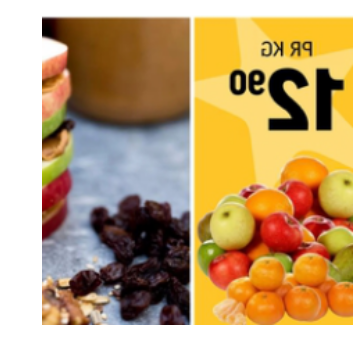

Class: [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


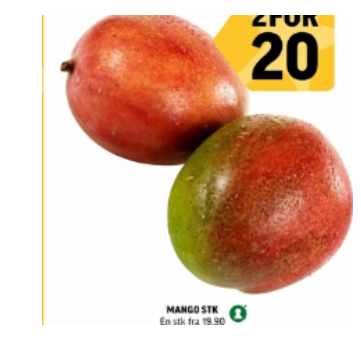

Class: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


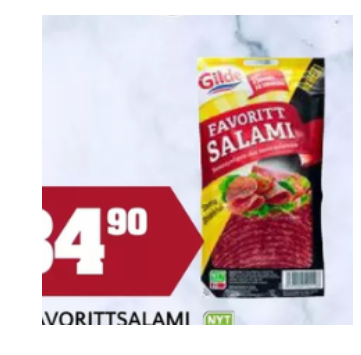

Class: [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


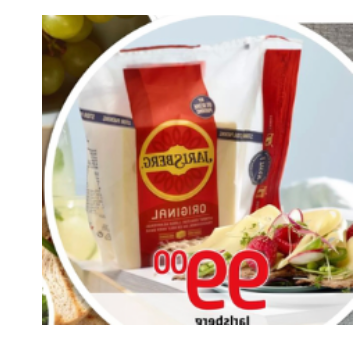

Class: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


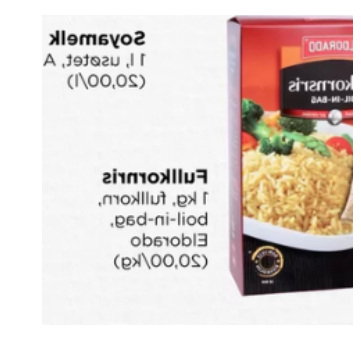

Class: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


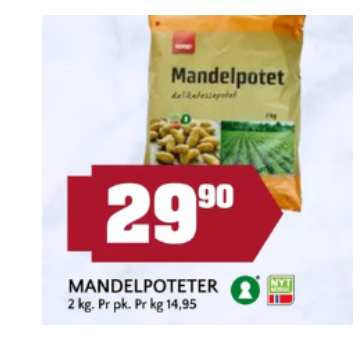

Class: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


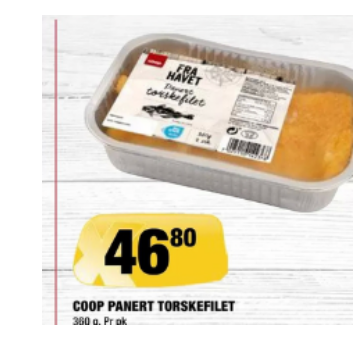

In [ ]:
##TESTING the input pipeline
%matplotlib inline
_R_MEAN = 123.68
_G_MEAN = 116.78
_B_MEAN = 103.94
from matplotlib import pyplot as plt
import numpy as np
with tf.Graph().as_default():
    matifyDataset = MatifyDataset(datasetDir = 'Matify/MatifyDataset/', nValidations = 20, verbose = False);
    dataset = matifyDataset.getSplit('train')
    nClasses = matifyDataset.nClasses
    #Data provider that read tfrecord files and return image and label tensor
    provider = slim.dataset_data_provider.DatasetDataProvider(
                      dataset,
                      num_readers=1,
                      common_queue_capacity=20 * 10,
                      common_queue_min=10 * 10)
    [image, label] = provider.get(['image', 'label'])
    #Add subgraph that preprocess the input image
    image = MatifyDatasetPreprocessing.preprocess_image(image, args.image_size, 
                                                        args.image_size, is_training=True)
        
    ##create tensor contain batck of images and labels
    images, labels = tf.train.batch(
          [image, label],
          batch_size=args.batch_size,
          num_threads=args.preprocessing_threads,
          capacity=5 * args.batch_size)
    labels = slim.one_hot_encoding(labels, nClasses)
    ## Create a FIFOQueue to fetch batch in FIFO fashion
    batch_queue = slim.prefetch_queue.prefetch_queue(
          [images, labels], capacity=2 * deploy_config.num_clones)
    images, labels = batch_queue.dequeue()
    print images
    init_op = tf.initialize_all_variables()
    # Start input enqueue threads.
    coord = tf.train.Coordinator()
    
    with tf.Session() as sess:
        # Initialize the variables (like the epoch counter).
        sess.run(init_op)
        threads = tf.train.start_queue_runners(sess=sess, coord=coord)

        xs, ys = sess.run([images, labels])
        
        print np.asarray(xs).shape
        print np.asarray(ys).shape
        means = [123.68, 116.779, 103.939]
        for x, y in zip(xs, ys):
            channels = np.split(np.asarray(x), 3, 2)
            for i in range(3):
                channels[i] += means[i]
            print 'Class: ' + str(y)
            image = np.concatenate(channels, 2)
            plt.figure()
            plt.imshow(image.astype(np.uint8))
            plt.axis('off')
            plt.show()
        coord.request_stop()
        # Show the downloaded image
        

In [ ]:
tf.reset_default_graph()
from nets import vgg

with tf.Graph().as_default() as g:
    with tf.device(deploy_config.variables_device()):
        global_step = slim.create_global_step()
        
    #Define which weights are restored and which weights are initialized
    weights_restored_from_file = slim.get_variables_to_restore(exclude=['vgg_16/fc8'])

    weights_randomly_initialized = slim.get_variables_to_restore(include=['vgg_16/fc8'])

    init_assign_op, init_feed_dict = slim.assign_from_checkpoint(
                                      os.path.join(args.checkpoints_dir, 'vgg_16.ckpt'),
                                        weights_restored_from_file)
    init_op = tf.initialize_variables(weights_randomly_initialized)
    # Create an initial assignment function for slim.learning.train method
    def InitAssignFn(sess):
        sess.run(init_op)
        sess.run(init_assign_op, init_feed_dict)
        
    #Load Matify Dataset
    matifyDataset = MatifyDataset(datasetDir = 'Matify/MatifyDataset/', nValidations = 20, verbose = False);
    dataset = matifyDataset.getSplit('train')
    nClasses = matifyDataset.nClasses
    
    network_fn = vgg.vgg_16
    
    #Attach subgraph to current vgg16 graph to compute loss function and gradient callculation
    def clone_fn(batch_queue):
        images, labels = batch_queue.dequeue()
        logits, end_points = network_fn(images, num_classes=nClasses, is_training=True)
        slim.losses.softmax_cross_entropy(logits, labels)
        predictions = tf.argmax(logits, 1)
        labels = tf.argmax(labels, 1)
        accuracy, update_op = slim.metrics.streaming_accuracy(
           predictions,
           labels,
           metrics_collections=['accuracy'],
           updates_collections=tf.GraphKeys.UPDATE_OPS)
        return end_points

    with tf.device(deploy_config.inputs_device()):
        with tf.name_scope('inputs'):
            #Construct FIFO queue for input data
            provider = slim.dataset_data_provider.DatasetDataProvider(
                  dataset,
                  num_readers=args.reader_threads,
                  common_queue_capacity=20 * args.batch_size,
                  common_queue_min=10 * args.batch_size)
            [image, label] = provider.get(['image', 'label'])

            #Add subgraph that preprocess the input image
            image = MatifyDatasetPreprocessing.preprocess_image(image, 224, 224, is_training=True)

            images, labels = tf.train.batch(
                  [image, label],
                  batch_size=args.batch_size,
                  num_threads=args.preprocessing_threads,
                  capacity=5 * args.batch_size)
            labels = slim.one_hot_encoding(labels, nClasses)

            batch_queue = slim.prefetch_queue.prefetch_queue(
                  [images, labels], capacity=2 * deploy_config.num_clones)

    summaries = set(tf.get_collection(tf.GraphKeys.SUMMARIES))
    clones = model_deploy.create_clones(deploy_config, clone_fn, [batch_queue])
    first_clone_scope = deploy_config.clone_scope(0)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, first_clone_scope)

    with tf.name_scope('synchronized_train'):
        with tf.device(deploy_config.optimizer_device()):
            learning_rate = tf.train.exponential_decay(
                args.learning_rate,
                global_step,
                args.learning_rate_decay_steps,
                args.learning_rate_decay,
                staircase=True,
                name='exponential_decay_learning_rate')
            optimizer = tf.train.AdamOptimizer(learning_rate)
        variables_to_train = tf.trainable_variables()
        total_loss, clones_gradients = model_deploy.optimize_clones(
                clones,
                optimizer,
                var_list=variables_to_train)
        grad_updates = optimizer.apply_gradients(clones_gradients,
                                                 global_step=global_step)
        update_ops.append(grad_updates)
        update_op = tf.group(*update_ops)
        train_tensor = control_flow_ops.with_dependencies([update_op],
                                                          total_loss,
                                                          name='train_op')
    with tf.name_scope('summaries'):
        end_points = clones[0].outputs
        for end_point in end_points:
            x = end_points[end_point]
            summaries.add(tf.histogram_summary('activations/' + end_point, x))
            summaries.add(tf.scalar_summary('sparsity/' + end_point,
                                            tf.nn.zero_fraction(x)))
        for variable in slim.get_model_variables():
            summaries.add(tf.histogram_summary(variable.op.name, variable))
        summaries.add(tf.scalar_summary('learning_rate', learning_rate,
                                        name='learning_rate'))
        summaries.add(tf.scalar_summary('eval/total_loss', total_loss,
                                        name='total_loss_summary'))
        accuracy = tf.get_collection('accuracy', first_clone_scope)[0]
        summaries.add(tf.scalar_summary('eval/accuracy', accuracy))
        summaries |= set(tf.get_collection(tf.GraphKeys.SUMMARIES,
                                           first_clone_scope))
        summary_op = tf.merge_summary(list(summaries), name='summary_op')
    
    slim.learning.train(
        train_tensor,
        args.output_training_dir,
        init_fn=InitAssignFn,
        summary_op=summary_op,
        number_of_steps=args.max_steps,
        log_every_n_steps=args.print_log_steps,
        save_summaries_secs=args.save_summaries_secs,
        save_interval_secs=args.save_checkpoint_secs)


INFO:tensorflow:Starting Session.
INFO:tensorflow:Starting Queues.
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:global step 100: loss = 2.2569 (0.87 sec/step)
INFO:tensorflow:global_step/sec: 1.05075
INFO:tensorflow:global step 200: loss = 2.2305 (0.89 sec/step)
INFO:tensorflow:global_step/sec: 1.1331
INFO:tensorflow:global step 300: loss = 2.2174 (0.88 sec/step)
INFO:tensorflow:global_step/sec: 1.13297
INFO:tensorflow:global step 400: loss = 2.0680 (0.90 sec/step)
INFO:tensorflow:global step 500: loss = 2.2954 (0.86 sec/step)
INFO:tensorflow:global_step/sec: 1.12967
INFO:tensorflow:global step 600: loss = 2.0966 (0.87 sec/step)
INFO:tensorflow:global_step/sec: 1.13748
INFO:tensorflow:global step 700: loss = 2.1907 (0.86 sec/step)
INFO:tensorflow:global_step/sec: 1.05668
INFO:tensorflow:global step 800: loss = 2.2234 (1.11 sec/step)
INFO:tensorflow:global step 900: loss = 2.0903 (0.96 sec/step)
INFO:tensorflow:global_step/sec: 0.98181
INFO:tensorflow:global step 1000: loss = 2.30

In [ ]:
#Evaluate the trained model
%matplotlib inline

from matplotlib import pyplot as plt

import numpy as np
import os
import tensorflow as tf
import urllib2

from datasets import imagenet
from nets import vgg
from preprocessing import vgg_preprocessing

checkpoints_dir = args.output_training_dir

slim = tf.contrib.slim

with tf.Graph().as_default():
    
    url = ("https://upload.wikimedia.org/wikipedia/commons/d/d9/"
           "First_Student_IC_school_bus_202076.jpg")
    
    # Open specified url and load image as a string
    image_string = urllib2.urlopen(url).read()
    
    # Decode string into matrix with intensity values
    image = tf.image.decode_jpeg(image_string, channels=3)
    
    # Resize the input image, preserving the aspect ratio
    # and make a central crop of the resulted image.
    # The crop will be of the size of the default image size of
    # the network.
    processed_image = MatifyDatasetPreprocessing.preprocess_image(image,
                                                                 args.image_size,
                                                                 args.image_size,
                                                                 is_training=False)
    
    # Networks accept images in batches.
    # The first dimension usually represents the batch size.
    # In our case the batch size is one.
    processed_images  = tf.expand_dims(processed_image, 0)
    
    # Create the model, use the default arg scope to configure
    # the batch norm parameters. arg_scope is a very conveniet
    # feature of slim library -- you can define default
    # parameters for layers -- like stride, padding etc.
    with slim.arg_scope(vgg.vgg_arg_scope()):
        logits, _ = vgg.vgg_16(processed_images,
                               num_classes=nClasses,
                               is_training=False)
    
    # In order to get probabilities we apply softmax on the output.
    probabilities = tf.nn.softmax(logits)
    
    # Create a function that reads the network weights
    # from the checkpoint file that you downloaded.
    # We will run it in session later.
    init_fn = slim.assign_from_checkpoint_fn(
        os.path.join(checkpoints_dir, 'vgg_16.ckpt'),
        slim.get_model_variables('vgg_16'))
    
    with tf.Session() as sess:
        
        # Load weights
        init_fn(sess)
        
        # We want to get predictions, image as numpy matrix
        # and resized and cropped piece that is actually
        # being fed to the network.
        np_image, network_input, probabilities = sess.run([image,
                                                           processed_image,
                                                           probabilities])
        probabilities = probabilities[0, 0:]
        sorted_inds = [i[0] for i in sorted(enumerate(-probabilities),
                                            key=lambda x:x[1])]
    
    # Show the downloaded image
    plt.figure()
    plt.imshow(np_image.astype(np.uint8))
    plt.suptitle("Downloaded image", fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()
    
    # Show the image that is actually being fed to the network
    # The image was resized while preserving aspect ratio and then
    # cropped. After that, the mean pixel value was subtracted from
    # each pixel of that crop. We normalize the image to be between [-1, 1]
    # to show the image.
    plt.imshow( network_input / (network_input.max() - network_input.min()) )
    plt.suptitle("Resized, Cropped and Mean-Centered input to network",
                 fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()

    names = matifyDataset.labels_to_names;
    for i in range(5):
        index = sorted_inds[i]
        # Now we print the top-5 predictions that the network gives us with
        # corresponding probabilities. Pay attention that the index with
        # class names is shifted by 1 -- this is because some networks
        # were trained on 1000 classes and others on 1001. VGG-16 was trained
        # on 1000 classes.
        print('Probability %0.2f => [%s]' % (probabilities[index], names[index+1]))
        
    res = slim.get_model_variables()